# Seaborn

---

Trabajamos previamente con `Matplotlib`, y alguien seguramente pensó:
> ¿Por qué tengo que escribir diez líneas de código para poder crear un histograma bonito?

Seaborn simplifica la tarea de crear visualizaciones bonitas y legibles. A continuación realizaremos un análisis exploratorio de una base de datos de Pokemones utlizando Seaborn.

---

## Introducción
`Seaborn` provee una interfaz de alto nivel para `Matplotlib`. `Seaborn` tiene muchas ventajas, y en la práctica he indentificado 5 cosas que con puro `matplotlib` son, a veces, complicadas de hacer, pero que `Seaborn` simplifica en gran medida:
1. Usar temas que son agradables a la vista
2. Crear y utilziar paletas de colores
3. Crear gráficas estadísticas atractivas
4. Mostrar distribuciones de manera fácil y flexible
5. Visualizar información proveniente directamente de un `DataFrame`.

Estos puntos hacen que `Seaborn` sea la herramienta perfecta para llevar a cabo un análisis exploratorio de datos.

---

Es cierto que Seaborn simplifica la visualización de datos con python, sim embargo, es una librería que tiene muchas funcionalidades. Por lo tanto, la mejor manera de aprender Seaborn es *learn by doing* aprender haciendo.

### 1. Entender las características y funcionalidades básicas de la libreria.
Toda librería de visualización de datos tiene "su manera" de hacer visualización; su manera de entender los datos. Entonces es imperativo entender cómo lo hace Seaborn. Dicho de otra manera, tenemos que entender cómo piensa Seaborn.
### 2. Cargar un dataset para practicar
Una vez que entendamos lo básico, es hora de cargar un conjunto de datos para aprender con ejemplos prácticos.
### 3. Navegar galerias, blogs y documentación para inspirarnos.
Hay una cantidad enorme de recursos que podemos utilziar para continuar con nuestro aprendizaje y manejo de Seaborn.

En [esta liga](http://seaborn.pydata.org/api.html) está la documentación de Seaborn.

Comencemos!

---

### 1. Instalación
~~~~bash
pip3 install --user seaborn
~~~~

### 2. Importar librerias y dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('data/pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Este dataset contiene los datos de combate para los 151 Pokemones de la primera generación.

## 3. Funciones de graficado de Seaborn
Una de las principales fortalezas/ventajas de Seaborn son sus diversas funciones de graficado o *plotting functions*. Por ejemplo: hacer una gráfica de dispersión (*scatter plot*) es tan simple como escribir una sola línea de código utilizando la función `lmplot()`.

Hay dos formas de hacer esto:
1. **Recomendada**: pasar nuestro DataFrame al argumento `data=`, y pasar los nombres de las columnas a los argumentos `x=` y `y=`.
2. Pasar cada serie de datos a cada eje (X y Y).

Comparemos el ataque y la defensa (`df.Attack` & `df.Defense`) de nuestros Pokemones.

Pero primero hagámoslo con Matplotlib

Text(0,0.5,'Defense')

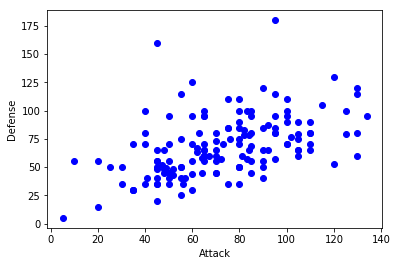

In [15]:
plt.plot(df.Attack, df.Defense, 'bo')
plt.xlabel('Attack')
plt.ylabel('Defense')

Ahora con Seaborn

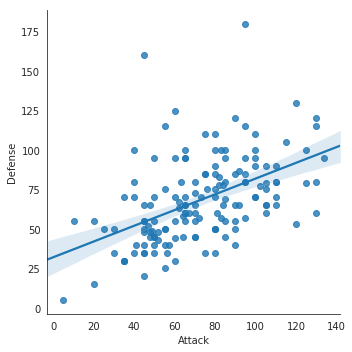

In [21]:
sns.lmplot(x='Attack', y='Defense', data=df)

Cambiemos rápido el tema de Seaborn a `darkgrid`

In [22]:
sns.set_style("darkgrid")

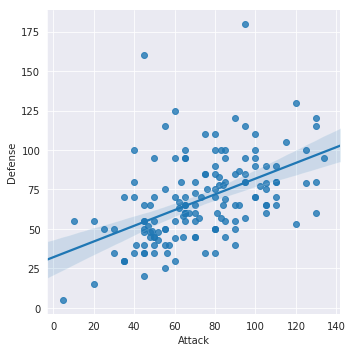

In [23]:
sns.lmplot(x='Attack', y='Defense', data=df)

Seaborn no tiene como tal una función para una gráfica de dispersión. Es por eso que tenemos una línea diagnonal entre nuestras observaciones. La función que utilizamos sirve para ajustar un conjunto de datos a una línea de regresión.

Sin embargo, modificar esto es muy fácil debido a que cada función de graficado tiene diferentes opciones que podemos moldear. Hagámoslo para `lmplot()`.
* Primero pondremos `fit_reg=False` para deshacernos de la línea de regresión (porque únicamente nos in teresa la gráfica de dispersión).
* Colocaremos `hue='Stage'` para **colorear** nuestros puntos conforme al nivel de evolución de cada punto (de cada Pokemon). Este argumento `hue` **ES EXTREMADAMENTE ÚTIL** porque nos permite exprear una tercera dimensión de información utilizando color.

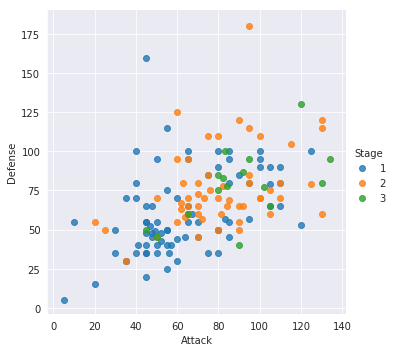

In [29]:
sns.lmplot(x='Attack', y='Defense' ,data=df , \
           fit_reg=False,  #quitar línea de regresión \
           hue='Stage' #colorear los puntos por etapa de evolución \
            )

### 4. Alteraciones con Matplotlib
Recordemos que Seaborn es meramente una interfaz de alto nivel de Matplotlib, y por lo tanto podemos hacer uso de Matplotlib en conjunto con Seaborn. En mi experiencia, Seaborn es más que suficiente en la mayoría de los casos, pero sí hay algunas cosas que tendrán que hacerse directamente en Matplotlib.

Especificar el límite de nuestro eje X y eje Y es una de esas cosas que tenemos que hacer directamente en Matplotlib. Y el proceso es bastante simple.
1. Primero invocamos la función de graficado de Seaborn como lo hicimos anteriormente.
2. Después invocaremos funciones de modificación/personalización de Matplotlib. En este caso usaremos las funciones `xlim()`y `ylim()`.

(20, 190.44212186867063)

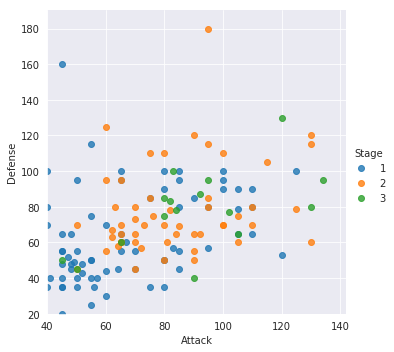

In [34]:
sns.lmplot(x='Attack', y='Defense', data=df, hue='Stage', fit_reg=False)
plt.xlim(40)
plt.ylim(20)

### 5. El rol de Pandas